# Virat Kohli's Cricket Performance Insights: A Statistical Overview

Introduction:
In an illustrious cricket career spanning 132 matches against 11 different countries, Virat Kohli has left an indelible mark as one of the finest batsmen in the sport. Let's delve into the numbers that define his performance against various teams, venues, batting positions, and more.

# Loading Required Dataset And Libraries:

In [308]:
import pandas as pd
import matplotlib.style
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
data_info=pd.read_csv("D:\\DataDictionary-Cricket.csv")

In [310]:
data_info

,Column Name,Description
0,Runs,The number of runs scored by Virat in that par...
1,Mins,Total time taken by Virat to score the runs. E...
2,BF,Total number of balls faced by Virat to score ...
3,4s,Number of fours hit by Virat in that match
4,6s,Number of sixes hit by Virat in that match
5,SR,The strike rate of Virat in that match.
6,Pos,The batting position of Virat in that match.
7,Dismissal,The mode of dismissal in that match.
8,Inns,Denotes whether team batted first or batted se...
9,Opposition,The opposition country against which Virat pla...


In [311]:
df=pd.read_csv("D:\\Virat_Kohli_ODI.csv")

In [341]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Boundaries_count,Boundary_runs,Balls_per_Boundary
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,1,4,22.000000
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,6,24,11.166667
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,4,16,9.500000
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,7,28,9.428571
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,4,18,11.500000


# Exploring the Dataset

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


# Converting Datatypes

In [314]:
df["Runs"] = df["Runs"].str.replace("*", '')
df["Runs"]

C:\Users\91778\AppData\Local\Temp\ipykernel_8200\1803359325.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Runs"] = df["Runs"].str.replace("*", '')


0       12
1       37
2       25
3       54
4       31
      ... 
127     45
128     65
129    122
130      8
131     55
Name: Runs, Length: 132, dtype: object

In [315]:
df["Runs"] = df["Runs"].astype(int)

In [316]:
df['SR'] = df['SR'].replace('-', ).astype(float)

In [317]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [318]:
df.dtypes

Runs                   int32
Mins                  object
BF                     int64
4s                     int64
6s                     int64
SR                   float64
Pos                    int64
Dismissal             object
Inns                   int64
Opposition            object
Ground                object
Start Date    datetime64[ns]
dtype: object

# Analyzing Performance

In [319]:
df.columns

Index(['Runs', 'Mins', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [320]:
df["Dismissal"].unique()

array(['lbw', 'caught', 'run out', 'bowled', 'not out', 'stumped',
       'hit wicket'], dtype=object)

In [342]:
df["Opposition"].value_counts()

v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: Opposition, dtype: int64

In [321]:
df["Dismissal"].value_counts()

caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: Dismissal, dtype: int64

In [322]:
dismiss_count=df.value_counts("Dismissal").sum()
dismiss_count

132

In [323]:
outs =df["Dismissal"].isin(['lbw', 'caught', 'run out', 'bowled', 'stumped',
       'hit wicket'])
total_outs = outs.sum()
total_outs

115

In [324]:
df_notout=dismiss_count-total_outs
df_notout

17

# Creating Calculated Columns (Feature Engineering)

In [325]:
Total_runs=df["Runs"].sum()
Total_runs

6184

In [326]:
batting_average = round(Total_runs / total_outs, 2)
batting_average

53.77

In [327]:
df['Boundaries_count']=df["4s"] + df["6s"]
Boundaries_count

0       1
1       6
2       4
3       7
4       4
       ..
127     3
128     3
129    13
130     2
131     8
Length: 132, dtype: int64

In [328]:
df['Boundary_runs']=df["4s"]*4 + df["6s"]*6
Boundary_runs

0       4
1      24
2      16
3      28
4      18
       ..
127    14
128    14
129    62
130     8
131    32
Length: 132, dtype: int64

In [329]:
Total_boundary_runs=Boundary_runs.sum()
Total_boundary_runs

2740

In [330]:
df['Balls_per_Boundary']=df["BF"]/Boundaries_count
Balls_per_Boundary

0      22.000000
1      11.166667
2       9.500000
3       9.428571
4      11.500000
         ...    
127    17.000000
128    25.333333
129     8.076923
130     2.500000
131     7.875000
Length: 132, dtype: float64

In [331]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Boundaries_count,Boundary_runs,Balls_per_Boundary
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,1,4,22.000000
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,6,24,11.166667
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,4,16,9.500000
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,7,28,9.428571
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,4,18,11.500000


In [332]:
df.isnull().sum()

Runs                  0
Mins                  0
BF                    0
4s                    0
6s                    0
SR                    0
Pos                   0
Dismissal             0
Inns                  0
Opposition            0
Ground                0
Start Date            0
Boundaries_count      0
Boundary_runs         0
Balls_per_Boundary    1
dtype: int64

In [333]:
df.groupby("Opposition").agg({'Runs': 'sum','Inns': 'sum', 'SR': 'mean'}).reset_index().sort_values(by="Runs",ascending=False)

,Opposition,Runs,Inns,SR
8,v Sri Lanka,1084,35,78.992500
9,v West Indies,1009,29,82.440526
0,v Australia,999,34,82.615500
5,v New Zealand,877,25,80.170714
2,v England,830,32,76.599048
7,v South Africa,558,25,68.557333
1,v Bangladesh,544,12,86.325000
10,v Zimbabwe,215,7,80.772000
3,v Ireland,34,2,64.150000
6,v Pakistan,22,5,37.670000


In [334]:
df.groupby("Opposition")["Dismissal"].count().sort_values(ascending=False)

Opposition
v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: Dismissal, dtype: int64

In [335]:
df.groupby("Opposition")[["Boundaries_count","Boundary_runs"]].sum().sort_values(by="Boundaries_count", ascending=False)

,Boundaries_count,Boundary_runs
Opposition,,
v Sri Lanka,117,486
v Australia,108,458
v West Indies,108,450
v England,92,390
v New Zealand,92,394
v Bangladesh,56,234
v South Africa,46,204
v Zimbabwe,23,96
v Ireland,3,12


# VISUALIZATION ON PERFORMANCE

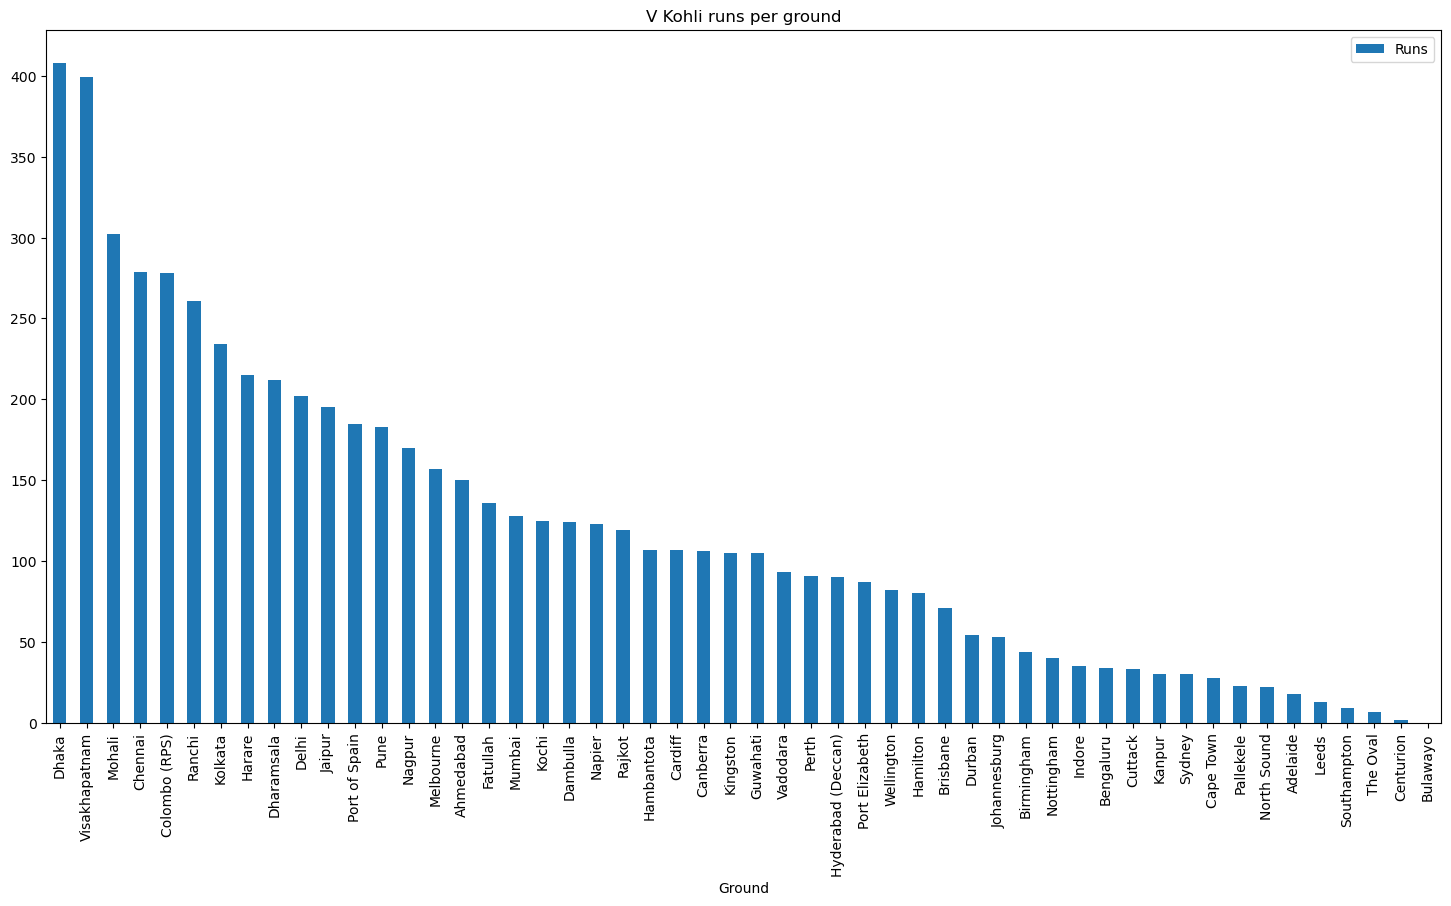

In [336]:
runs_per_ground_df = df.groupby("Ground").sum()
runs_per_ground_df = runs_per_ground_df.sort_values(by="Runs", ascending = False)
runs_per_ground_df.plot(figsize = (18,9), kind = "bar", y = "Runs")


plt.title("V Kohli runs per ground")
plt.show()

Text(0.5, 1.0, 'Runs At Position')

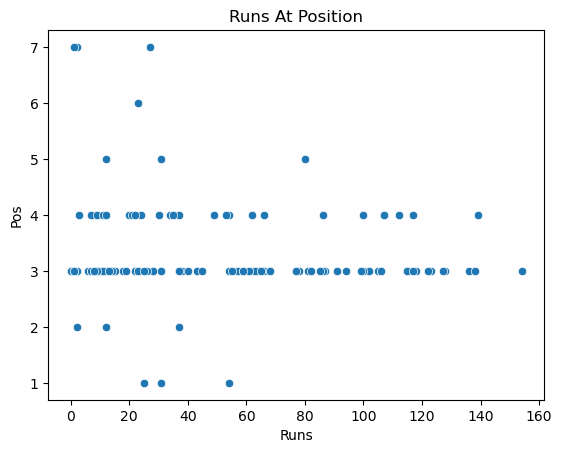

In [337]:
sns.scatterplot(data=df,x="Runs",y="Pos")
plt.title("Runs At Position")

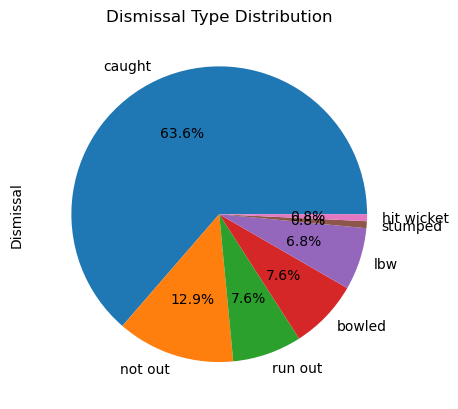

In [338]:
dismissal_distribution = df['Dismissal'].value_counts()
dismissal_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Dismissal Type Distribution')
plt.show()

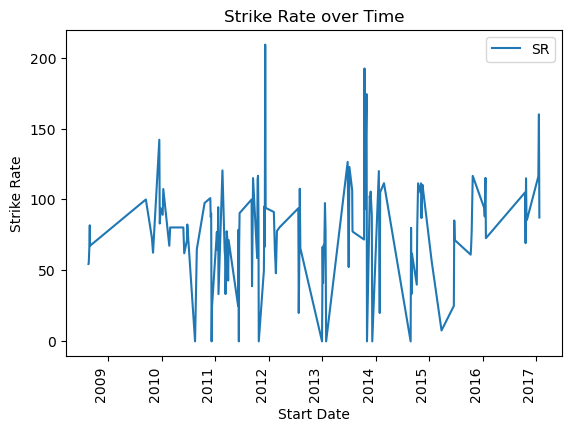

In [339]:
df.plot(x='Start Date', y='SR', kind='line')
plt.xlabel('Start Date')
plt.ylabel('Strike Rate')
plt.title('Strike Rate over Time')
plt.xticks(rotation=90)
plt.show()

# INSIGHTS BASED ON DATA PROVIDED :


In [ ]:
# Matches Played And Opposition Analysis:
#Virat Kohli played 132 matches against 11 countries.
#Majority of matches played against Sri Lanka, England, Australia, And West Indies.

#Batting Record:
#Kohli's total runs: 6184.
#Batting average: 53.77.
#Dismissed 115 times in 132 matches.

#Boundary Mastery:
#Kohli scored 2740 runs through boundaries.

#Exceptional performances against Sri Lanka, West Indies, Australia, New Zealand, and England.
#Maintaining good strike rate (>75) against these teams.

#Preferred Grounds:
#Kohli excelled on grounds like Dhaka, Visakhapatnam, Mohali, Chennai, Colombo, and Ranchi.

#Batting Success at No.3:
#Kohli performed exceptionally well batting at position number 3, demonstrating proficiency in this crucial spot in the lineup.

#Dismissal Patterns:
#Most dismissals by being caught out.

#performance over the years:
#In 2012, a phenomenalstrike rate of 200.
#Consistent strike rate (>125) since 2016.